# 16 - Regression Discontinuity Design


생각해보면 자연은 굉장히 매끄럽게(smooth) 흘러갑니다. 나무를 기르려면 싹부터 틔워야 하고, 한 곳에서 다른 곳으로 순간이동을 할 수는 없으며, 상처가 치유되는 데에는 시간이 걸리죠. 사회적인 분야에서도 매끄러움은 일반적인 현상입니다. 하루 만에 사업을 성장시킬 수는 없고, 부를 쌓기 위해서는 일관성과 노력이 필요합니다. 선형 회귀가 어떻게 작동하는지를 배우려면 수 년이 걸리죠. 정상적인 상황에서 자연은 매우 큰 결합력이 있습니다. 갑작스러운 도약은 드뭅니다.


> 혼백을 하나로 껴안고 떨어져나가지 않도록 할 수 있는가?

\- 도덕경, 노자.

그렇다면 **우리가 갑작스런 도약이나 급등을 보는 경우, 그것은 인위적인 요인에 의해 생겼을 가능성이 높습니다.** 이런 사건들은 '정상적인 상황'에 대한 반사실적(counterfactual) 정보를 주기도 합니다. 만약 이상한 일이 생겼다면, 변화가 자연스러웠다면 상황이 다르지 않았을까 하는 시사점을 주는 거죠. 회귀단절모형(Regression Discontinuity Design, RDD)의 핵심은 이런 인위적인 도약들을 살펴보는 것입니다.

![img](./data/img/rdd/smooth.png)

기본적인 설정은 다음과 같습니다. 처치변수 $T$와 잠재적 결과 $Y_0$, $Y_1$가 있다고 합시다. 그리고 처치 T는 실행변수 $R$의 관측값에 대한 불연속적인 함수로 정해집니다.

$
D_i = \mathcal{1}\{R_i>c\}
$

즉, $R$이 특정한 임계값 $c$보다 크면 1이고, 아니면 0입니다. $R>c$인 경우에는 $Y_1$를 얻고 $R<c$인 경우에는 $Y_0$을 얻습니다. 상황을 더 쉽게 이해하기 위해, 잠재적 결과가 두 개의 함수를 따른다고 가정해봅시다. 우리는 이 함수들을 완전히 관측할 수는 없습니다. $Y_0(R)$과 $Y_1(R)$의 값이 존재하긴 하지만, 우리가 직접 볼 수는 없는 거죠. 우리는 둘 중 하나의 함수만 볼 수 있습니다. 그리고 임계값 $c$가 둘을 구분하는 스위치 역할을 해주죠. 아래 그림처럼요.

![img](./data/img/rdd/rdd.png)

회귀단절의 핵심은 임계값 바로 위와 바로 아래의 결과를 비교하여, 임계값에서의 처치 효과를 구하는 것입니다. 이런 모형을 **Sharp RD** 모형이라고 합니다. 임계값에서 처치를 받을 확률이 0에서 1로 뛰기 때문입니다. 마찬가지로, 확률이 뛰기는 하지만 그렇게 극단적이지는 않은 **Fuzzy RD** 모형도 생각해 볼 수 있습니다.

## Is Alcohol Killing You?

최소 음주 연령은 공공 정책 분야에서 굉장히 중요한 사안 중 하나입니다. 브라질을 포함한 대부분의 국가는 18세부터 음주가 가능하지만, 한국은 19세부터 가능합니다. 미국 대부분의 주에서는 21세부터 가능하고요. 미국이 쓸데없이 조심하는 걸까요? 아니면 다른 나라들이 음주 가능 연령을 높여야 할까요?


이 문제에 접근하는 한 가지 방법은 사망률을 살펴보는 것입니다. [(Carpenter and Dobkin, 2009)](https://www.aeaweb.org/articles?id=10.1257/app.1.1.164) 공공 정책을 세우는 입장에서는 사망률을 최대한 낮추는 게 좋을 겁니다. 알코올 섭취가 사망률을 크게 높인다면 최소 음주 연령을 낮추는 것은 피해야 합니다. 알코올 섭취로 인한 사망률을 낮출 수 있을 테니까요.

법적 음주 연령은 자연에 불연속을 만들어줍니다. 이 사실을 이용해 알코올이 사망에 미치는 영향을 추정해 봅시다. 미국에서 21세 미만의 사람들은 술을 마시지 못 하는 반면, 21세 이상의 사람들은 술을 마실 수 있습니다. 음주 가능성이 21세를 전후로 뛰어오른다는 뜻이죠. 그리고 RDD를 이용해 이런 도약을 이용할 수 있습니다.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

style.use("fivethirtyeight")

연령별로 집계된 사망률 데이터를 살펴봅시다. 각 행에는 해당 그룹의 평균 연령, 원인을 막론한 사망률(`all`), 교통사고에 의한 사망률(`mva`) 그리고 자살률(`suicide`)이 있습니다. 

In [3]:
drinking = pd.read_csv("./data/drinking.csv")
drinking.head()[["agecell", "all", "mva", "suicide"]]

,agecell,all,mva,suicide
0,19.068493,92.825400,35.829327,11.203714
1,19.150684,95.100740,35.639256,12.193368
2,19.232876,92.144295,34.205650,11.715812
3,19.315070,88.427760,32.278957,11.275010
4,19.397260,88.704940,32.650967,10.984314


가독성을 높이기 위해, 변수 `agecell` 의 값을 조정하여 21세가 중앙에 오게 합시다. 뒤에 다루겠지만 다른 중요한 이유도 있습니다.

In [4]:
drinking["agecell"] -= 21

x축에 실행 변수를 두고 모든 결과변수(`all`, `mva`, `suicide`)의 그래프를 그려봅시다. 법적 음주 연령(`0.0`)을 전후로 일종의 도약을 관찰할 수 있습니다.

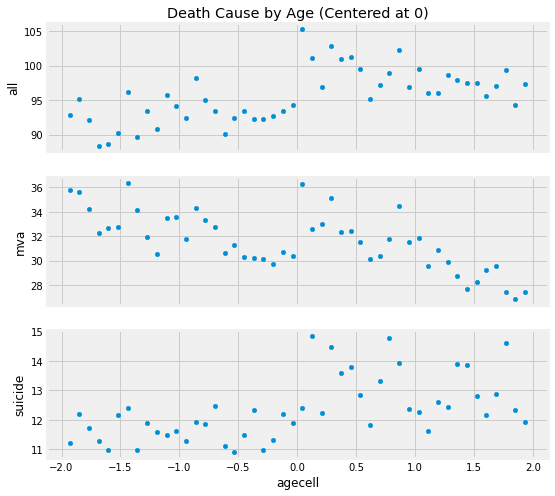

In [5]:
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
drinking.plot.scatter(x="agecell", y="all", ax=ax)
plt.title("Death Cause by Age (Centered at 0)")

ax = plt.subplot(3,1,2, sharex=ax)
drinking.plot.scatter(x="agecell", y="mva", ax=ax)

ax = plt.subplot(3,1,3, sharex=ax)
drinking.plot.scatter(x="agecell", y="suicide", ax=ax);


음주 가능 연령이 영향을 준다는 것 같기는 한데, 아직 부족합니다. 21세 근처에서 음주는 사망률에 정확히 얼마나 영향을 끼칠까요? 그리고 그 추정의 표준편차는 어떨까요?

## RDD Estimation

RDD의 핵심 가정은 '원래는 임계값 근처에서도 잠재적 결과가 매끄럽게 이어져야 한다'는 것입니다. 수학적으로 말하자면 실행변수가 임계값에 가까워질 때, 좌극한 값과 우극한 값이 같아야 한다는 뜻입니다.

$$
\lim_{r \to c^-} E[Y_{ti}|R_i=r] = \lim_{r \to c^+} E[Y_{ti}|R_i=r]
$$

이 가정이 성립한다면, 경계선 근처에서의 인과 효과는 다음과 같이 계산할 수 있습니다.

$$
\begin{align}
\lim_{r \to c^+} E[Y_{ti}|R_i=r] - \lim_{r \to c^-} E[Y_{ti}|R_i=r]=& \lim_{r \to c^+} E[Y_{1i}|R_i=r] - \lim_{r \to c^-} E[Y_{0i}|R_i=r] \\
=& E[Y_{1i}|R_i=r] - E[Y_{0i}|R_i=r] \\
=& E[Y_{1i} - Y_{0i}|R_i=r]
\end{align}
$$

이것은 일종의  LATE (Local Average Treatment Effect)입니다. 임계값 근처에서의 ATE만 알 수 있으니까요. 이런 상황에서, 우리는 RDD를 국소적(local)인 무작위 시험으로 생각할 수 있습니다. 임계값에 있는 사람들은 어느 쪽으로든 갈 수 있습니다. 그런데 우연히 어떤 사람들은 임계값 조금 아래에 배치되고, 어떤 사람들은 조금 위로 배치되죠. 우리의 예시에서 어떤 사람들은 21세를 조금 넘고 어떤 사람들은 21세를 조금 밑돌게 됩니다. 이것을 결정하는 것은 그 사람이 언제 태어났는지, 겨우 며칠 사이의 간격으로 결정되죠. 이것은 꽤나 무작위적입니다. 따라서 RDD는 매우 설득력 있는 인과 관계를 제공해줄 수 있습니다. 완벽한 RCT는 아니지만 이 정도면 충분합니다.

이제, 임계값에서의 처치 효과를 추정하려면 위의 공식에서 두 극한값을 계산해 비교하면 됩니다. 가장 간단한 방법은 선형회귀를 돌리는 것입니다.

![img](./data/img/rdd/ols.png)

이를 위해, 임계값 위에 있는지를 나타내는 더미 변수를 추가해 사용합니다.

$
y_i = \beta_0 + \beta_1 r_i + \beta_2 \mathcal{1}\{r_i>c\} + \beta_3 \mathcal{1}\{r_i>c\} r_i
$

이것은 임계값 전후로 다른 회귀모형을 구하는 셈입니다. 회귀모형을 돌렸을 때, 임계값 밑에서의 y 절편은 $\beta_0$이고, 임계값 위에서의 y 절편은 $\beta_0+\beta_2$이죠.

아까 `agecell`를 임계값 근처로 조정할 때, 중요한 이유가 있다고 했던 것 기억하시나요? `agecell`의 값을 조정하면 임계값은 0이 됩니다. 이 때, 절편 $\beta_0$는 임계값 밑에서 추정한 회귀모델의 예측값이 되죠. 즉, $\beta_0=\lim_{r \to c^-} E[Y_{ti}|R_i=r]$입니다. 마찬가지로 $\beta_0+\beta_2$는 임계값 위에서 추정한 회귀모델의 예측값입니다. 이로부터 아래 식을 구할 수 있습니다.

$
\lim_{r \to c^+} E[Y_{ti}|R_i=r] - \lim_{r \to c^-} E[Y_{ti}|R_i=r]=\beta_2=E[ATE|R=c]
$

파이썬 코드를 이용해 21세 전후로 알코올이 사망률에 미치는 영향을 추정해봅시다.

In [6]:
rdd_df = drinking.assign(threshold=(drinking["agecell"] > 0).astype(int))

model = smf.wls("all~agecell*threshold", rdd_df).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,93.6184,0.932,100.399,0.000,91.739,95.498
agecell,0.8270,0.819,1.010,0.318,-0.823,2.477
threshold,7.6627,1.319,5.811,0.000,5.005,10.320
agecell:threshold,-3.6034,1.158,-3.111,0.003,-5.937,-1.269


이 모형은 알코올 섭취와 함께 사망률이 7.6627 포인트 증가한다는 것을 알려줍니다. 알코올은 모든 원인에 의한 사망 확률을 8% (=100*((7.6627+93.6184)/93.6184-1)) 증가시킵니다. 이 방법을 통해 우리의 인과 효과 추정에 대한 표준 오류도 구할 수 있습니다. 이 경우 p-value가 0.01보다 작기 때문에 효과가 통계적으로 유의합니다.

이 모델을 시각적으로 검증해볼까요? 데이터에 대한 예측값을 그래프로 그려봅시다. 그래프를 보면 임계값을 전후로 두 개의 회귀 모형이 있는 것처럼 보이죠?

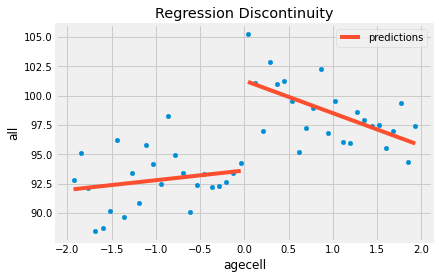

In [7]:
ax = drinking.plot.scatter(x="agecell", y="all", color="C0")
drinking.assign(predictions=model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

다른 사망원인에 대해서도 실행해봅시다.

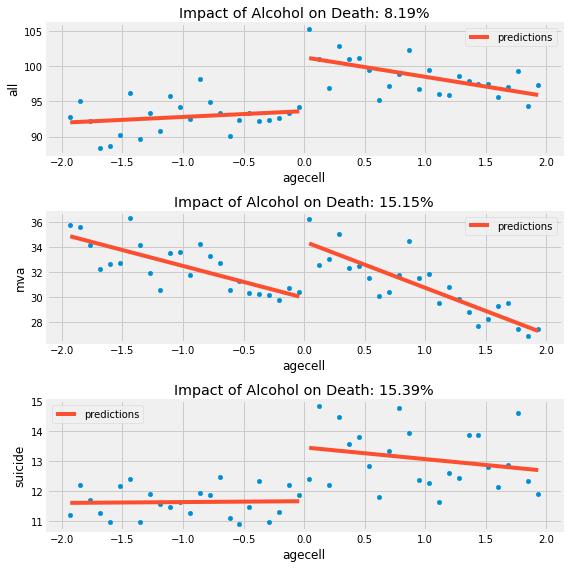

In [8]:
plt.figure(figsize=(8,8))

for p, cause in enumerate(["all", "mva", "suicide"], 1):
    ax = plt.subplot(3,1,p)
    drinking.plot.scatter(x="agecell", y=cause, ax=ax)
    m = smf.wls(f"{cause}~agecell*threshold", rdd_df).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    drinking.assign(predictions=m.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
    plt.title(f"Impact of Alcohol on Death: {np.round(ate_pct, 2)}%")

plt.tight_layout()

RDD에 따르면 알코올 섭취가 자살률과 교통사고율을 15%까지 올릴 수 있다고 합니다. 꽤나 큰 수치네요. 사망률을 최소화하고 싶다면 음주 연령을 낮추지 않는 것이 좋겠습니다.

### Kernel Weighting

회귀 단절은 선형 회귀의 외삽 특성에 크게 의존합니다. 그런데 우리는 2개의 회귀선에서 시작점과 끝점에 있는 값만 비교합니다. 그래서 이러한 단점을 보정할 필요가 있습니다. 임계값에서 멀찍이 떨어진 데이터들 때문에 임계값에서의 회귀 분석에 오류가 생긴다면 안 될테니까요. 이렇게 되면 처치 효과 측정이 잘못될 수 있습니다.

이를 해결하는 한 가지 방법은, 임계값에 가까운 데이터에 더 높은 가중치를 부여하는 것입니다. 이를 위한 방법은 여러 가지가 있지만 일반적인 방법은 **삼각 커널(triangular kernel)**로 샘플의 가중치를 재조정하는 것입니다.

$
K(R, c, h) = \mathcal{1}\{|R-c| \leq h\} * \bigg(1-\frac{|R-c|}{h}\bigg)
$

이 커널의 첫 번째 부분은 어떤 데이터가 임계값에 가까운지를 알려줍니다. 그 가까움의 범위는 어떻게 정해줄까요? 삼각형의 너비를 정하는 파라미터 $h$가 '가까움'을 결정합니다. 이 커널의 두 번째 부분은 가중치 함수입니다. 임계값에서 멀어질수록 가중치가 점점 더 작아지죠. 이러한 가중치를 삼각형 너비로 나누어줍니다. 너비가 크면 가중치가 더 느린 속도로 작아집니다. 너비가 작으면 가중치가 빠르게 0이 됩니다. 

이해를 돕기 위해, 저희가 만든 커널의 가중치가 어떤지 그려보겠습니다. 이 커널에서는 너비를 1로 설정했습니다. 즉, 22세 이하와 20세 이상의 사람들의 데이터만 고려합니다.

In [8]:
def kernel(R, c, h):
    indicator = (np.abs(R-c) <= h).astype(float)
    return indicator * (1 - np.abs(R-c)/h)

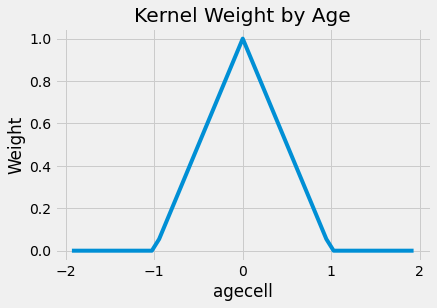

In [9]:
plt.plot(drinking["agecell"], kernel(drinking["agecell"], c=0, h=1))
plt.xlabel("agecell")
plt.ylabel("Weight")
plt.title("Kernel Weight by Age");

이 커널을 적용하면 알코올이 사망률에 끼치는 영향이 더 커집니다. 적어도 모든 원인에 의한 사망률은요. 7.6627에서 9.7004 포인트로 증가하죠. 이 결과는 굉장히 중요합니다. 또, 제가 `ols` 대신 `wls`를 사용하는 것 주목하세요.

In [10]:
model = smf.wls("all~agecell*threshold", rdd_df,
                weights=kernel(drinking["agecell"], c=0, h=1)).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,93.2002,0.731,127.429,0.000,91.726,94.674
agecell,0.4109,1.789,0.230,0.819,-3.196,4.017
threshold,9.7004,1.034,9.378,0.000,7.616,11.785
agecell:threshold,-7.1759,2.531,-2.835,0.007,-12.276,-2.075


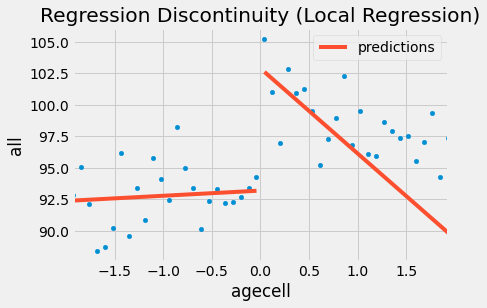

In [11]:
ax = drinking.plot.scatter(x="agecell", y="all", color="C0")
drinking.assign(predictions=model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity (Local Regression)");

다른 사망 원인에 대한 그래프는 아래와 같습니다. 맨 오른쪽의 데이터를 무시하니 회귀선의 기울기가 더 가파라졌네요!

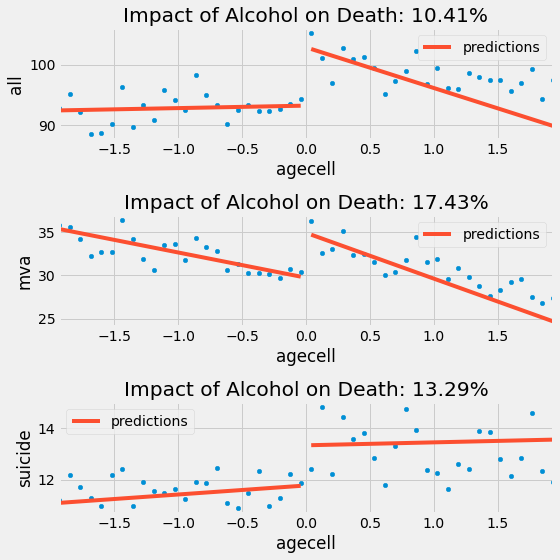

In [12]:
plt.figure(figsize=(8,8))
weights = kernel(drinking["agecell"], c=0, h=1)

for p, cause in enumerate(["all", "mva", "suicide"], 1):
    ax = plt.subplot(3,1,p)
    drinking.plot.scatter(x="agecell", y=cause, ax=ax)
    m = smf.wls(f"{cause}~agecell*threshold", rdd_df, weights=weights).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    drinking.assign(predictions=m.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
    plt.title(f"Impact of Alcohol on Death: {np.round(ate_pct, 2)}%")

plt.tight_layout()

커널 가중치를 더하니, 자살을 제외하고는 알코올의 부정적인 영향이 더 커졌습니다. 사망률을 최소화하고 싶다면 음주 가능 연령을 낮추면 절대 안 되겠습니다. 음주가 사망률에 미치는 영향이 확실하네요.

이 사례는 회귀단절모형이 완벽하게 작동하는 경우입니다. 다음으로는 RDD를 얼마나 신뢰할 수 있는지 판단하기 위해 몇 가지 체크해야 할 사항을 소개하겠습니다. 우리에게 아주 소중한 주제, 교육이 소득에 미치는 영향을 다루면서요.

## Sheepskin Effect and Fuzzy RDD

교육은 소득에 어떤 영향을 미칠까요? 경제학에서는 이에 대해 두 가지 견해가 있습니다. 첫 번째는 교육이 인적 자본과 생산성을 증가시켜 소득도 증가시킨다는 주장입니다. 이 관점에서는, 교육이 실제로 우리들을 더 나은 사람으로 변화시킵니다. 또 다른 관점은 교육이 멋진 타이틀만 달아준다는 것입니다. 교육은 그냥 여러분에게 시험과 과제를 던져줍니다. 당신이 그걸 통과한다면 멋진 타이틀을 달아주고, 당신이 좋은 직원이라는 것을 시장에 알려주죠. 이런 관점에서는 교육이 여러분을 더 생산적으로 만들지는 않습니다. 그저 당신이 원래 가지고 있던 생산성을 시장에 말해주는 것이죠. 이 관점에서 진짜 중요한 것은 졸업장입니다. 당신이 졸업장을 가지고 있다면 더 많은 돈을 받는 겁니다. 옛날에는 졸업장을 양가죽에 인쇄헸기 때문에 이것을 **양가죽 효과(sheepskin effect)**라고 부릅니다.

이 가설을 시험하기 위해, [Clark and Martorell](https://faculty.smu.edu/millimet/classes/eco7321/papers/clark%20martorell%202014.pdf)는 회귀단절모형을 이용해 12학년 졸업이 소득에 미치는 영향을 추정했습니다. 그러기 위해서는 어떤 실행 변수를 찾아야 했습니다. 어떤 임계값이 있어서, 그 위에 있는 학생들은 졸업하고 그 아래에 있는 학생들은 졸업하지 못하는 변수요. 마침 텍사스 교육 시스템에서 그러한 데이터가 있었습니다.

텍사스에서 졸업하려면 시험을 통과해야 합니다. 시험은 10학년부터 시작하고, 학생들은 그 시험에 여러 번 응시할 수 있습니다. 하지만 12학년 말에는 마지막 시험 기회가 있습니다. 그러면 이 마지막 시험에 응시한 학생들의 데이터를 살펴봅시다. 시험을 간신히 통과한 학생들과 아깝게 떨어진 학생들을 비교하는 거죠. 이 학생들의 경우, 인적 자본은 매우 비슷하지만 시장에서는 서로 다른 타이틀을 가지게 됩니다. 간신히 합격한 학생들은 졸업장을 받을 테니까요.

In [13]:
sheepskin = pd.read_csv("./data/sheepskin.csv")[["avgearnings", "minscore", "receivehsd", "n"]]
sheepskin.head()

,avgearnings,minscore,receivehsd,n
0,11845.086,-30.0,0.416667,12
1,9205.679,-29.0,0.387097,31
2,8407.745,-28.0,0.318182,44
3,11114.087,-27.0,0.377778,45
4,10814.624,-26.0,0.306667,75


이번에도 데이터는 실행변수에 따라 그룹이 나뉘어져 있습니다. 이 데이터에는 실행 변수(`minscore`, 이미 0에 중심이 맞춰져 있음)와 결과(`avgearnings`) 뿐만 아니라 해당 점수 그룹에서 졸업장을 받을 확률과 크기(`n`)도 포함되어 있습니다. 예를 들어, 점수가 임계값보다 -30 낮은 그룹에는 12명의 학생이 있고, 그 중에서 오직 5명(= 12 * 0.416)만이 졸업장을 받을 수 있었습니다. 

이 사례에서는 처치를 받았을 때 약간의 불이행 케이스가 있습니다. 합격선 아래에 있는 학생들도 어찌됐든 졸업장을 받아낸 경우가 있죠. 여기서 회귀 단절은 날카롭지(sharp) 않고 **어렴풋(fuzzy)**합니다. 임계값에서 졸업장을 받을 확률은 0에서 1로 뛰어오르지 않습니다. 50%에서 90%로 뛰어오르죠.

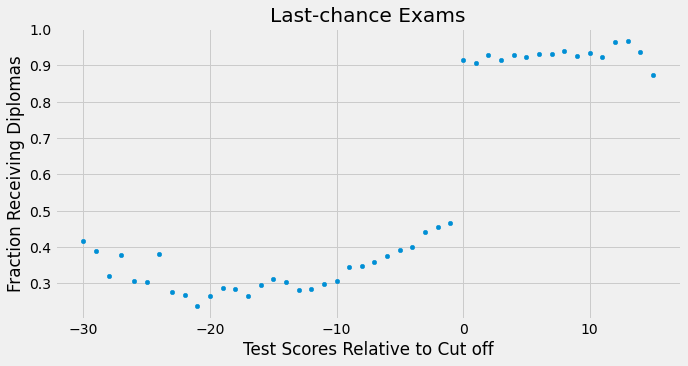

In [14]:
sheepskin.plot.scatter(x="minscore", y="receivehsd", figsize=(10,5))
plt.xlabel("Test Scores Relative to Cut off")
plt.ylabel("Fraction Receiving Diplomas")
plt.title("Last-chance Exams");

Fuzzy RD는 순응하지 않는 집단이 있다고 해석할 수 있습니다. 임계값을 넘으면 모두가 졸업장을 받을 수 있지만 어떤 청개구리들(never takers)은 졸업장을 안 받겠다고 합니다. 마찬가지로, 임계값 밑의 학생들은 졸업장을 못 받아야 하지만 언제나 쟁취하는(always takers) 일부 학생들은 어떻게 해서라도 졸업장을 받아냅니다. 

우리에게 잠재적 결과가 주어졌을 때와 마찬가지로, 이 상황에서는 잠재적인 처치 상태가 있다고 생각할 수 있습니다. 어떤 임계값이 있어서, 그 위의 사람들은 누구든지 $T_1$의 처치를 받고 밑의 사람들은 누구든지 $T_0$의 처치를 받는 거죠. 여러분도 눈치채셨겠지만, 우리는 **이 임계값을 도구 변수로 생각**할 수 있습니다. IV에서와 마찬가지로, 단순한 처치 효과를 추정하면 0으로 치우치게 됩니다.

![img](./data/img/rdd/rdd_fuzzy.png)

임계값 위인데도 처치를 받지 않을 확률이 존재합니다. 이 경우, 처치를 받았을 때의 진짜 잠재적 결과가 $Y_1$이라면, 우리의 관측값은 그보다 작아지게 되죠. 마찬가지로, 임계값 밑에서 우리가 관측한 값은 진짜 결과가 $Y_0$보다 클 겁니다. 이러면 처치 효과가 실제보다 작게 관측되겠죠. 도구변수를 이용해 이를 해결할 수 있습니다.

앞에서는 잠재적인 결과가 '매끄럽게' 나타난다고 가정했습니다. 마찬가지로, 잠재적 처치 역시 '매끄럽다'고 가정해봅시다. 또한, 도구변수를 이용할 때처럼 단조성(monotonicity)도 가정할 필요가 있습니다. 이는 $T_{i1}>T_{i0} \ \forall i$를 의미합니다. 그러면 임계값 밑에서 위로 넘어갈 때, 졸업장을 받을 확률은 높아지기만 하고 낮아지지는 않습니다. 이 두 가지 가정 하에서, 우리는 LATE에 대한 Wald Estimator를 추정할 수 있습니다.

$$
\dfrac{\lim_{r \to c^+} E[Y_i|R_i=r] - \lim_{r \to c^-} E[Y_i|R_i=r]}{\lim_{r \to c^+} E[T_i|R_i=r] - \lim_{r \to c^-} E[T_i|R_i=r]} = E[Y_{1i} - Y_{0i} | T_{1i} > T_{0i}, R_i=c]
$$

이것은 두 가지 의미에서 국소적인(local한) 추정치입니다. 첫째, 임계값 $c$에서의 처치 효과만 알 수 있기 때문에 국소적입니다. 이것은 RD의 국소성(RD locality)입니다. 둘째, 순응자(complier)에 대한 치료 효과만 추정하기 때문에 국소적입니다. 이것은 도구변수의 국소성(IV locality)입니다.

이를 추정하기 위해 2개의 선형 회귀 분석을 사용할 것입니다. 위 식의 분자는 우리가 이전에 했던 것처럼 추정할 수 있습니다. 분모를 계산하기 위해서는 결과를 처치로 바꾸기만 하면 됩니다. 그런데 그 전에, RDD 추정치를 신뢰할 수 있는지 확인하기 위해 건전성 검사를 실시해야 합니다.

### The McCrary Test

사람들이 임계값 위에 있을지, 밑에 있을지를 스스로 결정한다면 어떨까요? 이 경우 우리의 RDD 추정은 무의미해집니다. 양가죽 예제에서 생각해볼까요? 임계값 바로 아래에 있는 학생들이 시험 점수를 조금이라도 올릴 수 있는 방법을 찾았을 수도 있습니다. 또 다른 예시로, 정부 혜택을 받기 위해서는 특정 소득 수준 이하가 되어야 합니다. 어떤 가족은 그런 프로그램에 참여하기 위해 일부러 수입을 낮출 수도 있습니다.

이런 경우에는 실행 변수의 밀도함수를 그렸을 때, 뭉침(bunching)이라는 현상이 나타납니다. 개체들이 임계값 바로 위나 바로 아래에 몰리게 되는 현상입니다. 이를 확인하기 위해 실행 변수의 밀도 함수를 그려보고, 임계값 주변에 급증이 있는지 확인해봐야 합니다. 우리의 사례에서 밀도는 데이터의 `n`열에 있습니다.

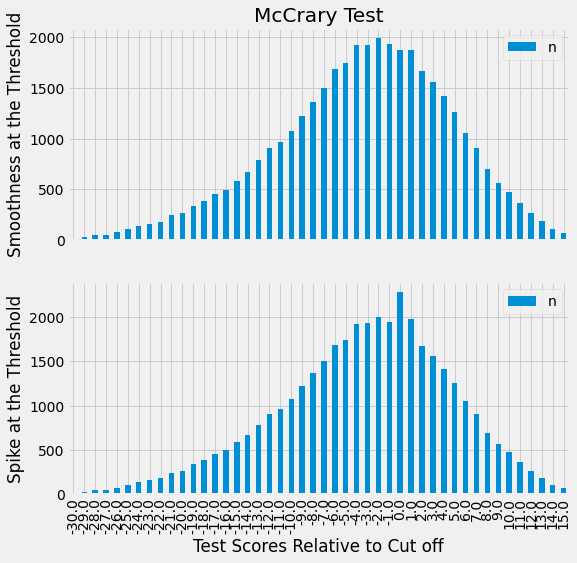

In [15]:
plt.figure(figsize=(8,8))

ax = plt.subplot(2,1,1)
sheepskin.plot.bar(x="minscore", y="n", ax=ax)
plt.title("McCrary Test")
plt.ylabel("Smoothness at the Threshold")

ax = plt.subplot(2,1,2, sharex=ax)
sheepskin.replace({1877:1977, 1874:2277}).plot.bar(x="minscore", y="n", ax=ax)
plt.xlabel("Test Scores Relative to Cut off")
plt.ylabel("Spike at the Threshold");

첫 번째 그림에는 저희 데이터의 데이터 밀도가 나와있습니다. 보시다시피 임계값 주변에 급증하는 현상이 있지는 않습니다. 뭉침 현상이 없다는 뜻이죠. 학생들은 임계값 근처에서 값을 조작하지 않고 있습니다. 학생들이 임계값 근처에서 자기의 값을 조작할 수 있었다면 어땠을까요? 두 번째 그림은 그런 경우를 보여주기 위해 만든 데이터입니다. 임계값 바로 위의 데이터가 급증하는 것을 볼 수 있죠? 시험을 통과하기를 선택하는 학생들이 많았기 때문입니다.

이제 검사를 마쳤으니 다시 돌아가 양가죽 효과를 추정해봅시다. 앞서 말했듯이, Wald estimator의 분자는 Sharp RD와 같은 방식으로 추정할 수 있습니다. 여기서는 너비가 15인 커널을 가중치로 사용하겠습니다. 각 그룹의 크기를 바탕으로, 우리는 커널에 샘플 크기를 곱해서 최종적인 가중치를 정할 것입니다.

In [16]:
sheepsking_rdd = sheepskin.assign(threshold=(sheepskin["minscore"]>0).astype(int))
model = smf.wls("avgearnings~minscore*threshold",
                sheepsking_rdd,
                weights=kernel(sheepsking_rdd["minscore"], c=0, h=15)*sheepsking_rdd["n"]).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.399e+04,83.678,167.181,0.000,1.38e+04,1.42e+04
minscore,181.6636,16.389,11.084,0.000,148.588,214.739
threshold,-97.7571,145.723,-0.671,0.506,-391.839,196.325
minscore:threshold,18.1955,30.311,0.600,0.552,-42.975,79.366


분석 결과, 졸업장의 효과는 -97.7571이지만 통계적으로 유의하지 않습니다(p-value 0.5 이상). 결과를 그래프에 표시해볼까요? 임계값 근처에서 매우 연속적인 선이 나타납니다. 더 많은 교육을 받은 사람들이 돈을 더 많이 벌기는 하지만, 12학년 졸업장을 받는 점수 전후로는 도약이 없습니다. 교육은 단순히 사람들에게 타이틀만 달아주는 게 아니라, 실제로 사람들을 더 생산적으로 만들어준다는 주장을 뒷받침해주죠. 즉, 양가죽 효과는 없습니다.

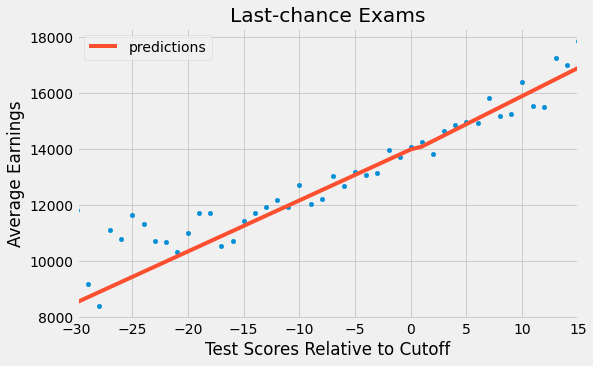

In [17]:
ax = sheepskin.plot.scatter(x="minscore", y="avgearnings", color="C0")
sheepskin.assign(predictions=model.fittedvalues).plot(x="minscore", y="predictions", ax=ax, color="C1", figsize=(8,5))
plt.xlabel("Test Scores Relative to Cutoff")
plt.ylabel("Average Earnings")
plt.title("Last-chance Exams");

하지만 비순응자가 섞여 있으니, 처치 효과가 0에 치우친 것은 당연한 일입니다. 그 영향을 바로잡기 위해서는 1단계 스케일을 수정하여 Wald estimator를 구해야 합니다. 불행히도 이것을 수행하는 좋은 파이썬 구현은 없습니다. 부트스트랩을 이용해 직접 표준 오류를 얻어야 합니다.

아래 코드는 우리가 이전에 했던 것처럼 Wald estimator의 분자를 실행합니다. 분모에서는 타겟 변수를 처리 변수 `receivehsd`로 대체합니다. 그리고 마지막으로, 분자를 분모로 나눠줍니다.

In [18]:
def wald_rdd(data):
    weights=kernel(data["minscore"], c=0, h=15)*data["n"]
    denominator = smf.wls("receivehsd~minscore*threshold", data, weights=weights).fit()
    numerator = smf.wls("avgearnings~minscore*threshold", data, weights=weights).fit()
    return numerator.params["threshold"]/denominator.params["threshold"]

In [19]:
from joblib import Parallel, delayed 

np.random.seed(45)
bootstrap_sample = 1000
ates = Parallel(n_jobs=4)(delayed(wald_rdd)(sheepsking_rdd.sample(frac=1, replace=True))
                          for _ in range(bootstrap_sample))
ates = np.array(ates)

부트스트랩 샘플을 이용해 ATE 분포를 플롯하고, 95% 신뢰구간을 그려봅시다.

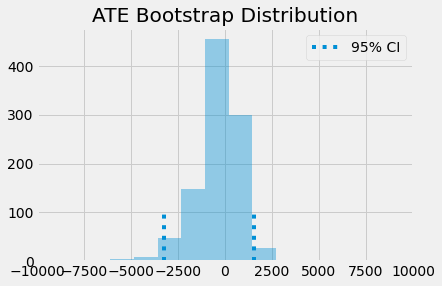

In [20]:
sns.distplot(ates, kde=False)
plt.vlines(np.percentile(ates, 2.5), 0, 100, linestyles="dotted")
plt.vlines(np.percentile(ates, 97.5), 0, 100, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.xlim([-10000, 10000])
plt.legend();

보시다시피, 효과를 스케일링한 후에도 처치 효과는 통계적으로 0과 차이가 없습니다. 이것은 교육이 소득을 증가시키는 것이 단순히 양가죽 효과는 아니라는 것을 보여줍니다. 학생의 생산성을 증가시킴으로써 소득을 증가시키는 것이죠.

## Key Ideas

저희는 인공적인 불연속성을 이용해 인과 효과를 추정하는 방법을 배웠습니다. 특정 임계값이 있어서 그 전후로 처치 확률이 뛰어오르는 경우죠. 우리가 본 사례에서, 나이가 21세 전후일 때 음주 확률이 확 높아졌습니다. 그리고 이 사실을 이용해 음주가 사망률에 미치는 영향을 추정할 수 있었습니다. 임계값 근처에서는 무작위 실험과 같은 효과를 얻을 수 있습니다. 임계값 근처의 개체들은 어디에든 소속될 수 있었는지, 사실상 무작위로 임계값 위일지 밑일지가 정해졌으니까요. 임계값 바로 위와 바로 아래를 비교하여 처치 효과를 얻을 수 있습니다. 또한, 우리는 커널을 사용하는 가중 선형 회귀를 적용하는 방법도 배웠습니다. 이런 방법들은 우리의 ATE에 대한 표준 오류도 제공해주죠.

그런 다음, 우리는 비순응자가 있는 Fuzzy RD 모형에서 어떤 일이 발생하는지를 살펴봤습니다. 그리고 이 경우에는 도구변수에서와 비슷하게 접근할 수 있었죠.


## References

이 책을 쓰기 위해 Joshua Angrist, Alberto Abadie, Christopher Walters의 대단한 계량 경제학 수업 자료를 많이 참고했습니다. 해당 자료에 있는 대부분의 아이디어는 전미경제학회(American Economic Association)의 수업에서 가져왔어요. 이렇게 좋은 참고자료를 보는 것이 2020년의 힘든 한 해를 지탱하게 만들어준 원동력이었다고 생각해요.

* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

또한, Angrist의 정말 좋은 책들을 참고자료에 넣고 싶어요. 해당 저자가 쓴 책들은 계량경제학(Econometrics) 또는 '메트릭스(Metrics, 계량적 분석)'가 매우 유용할 뿐만 아니라 매우 흥미롭다는 걸 알려주었어요.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering ‘Metrics](https://www.masteringmetrics.com/)

마지막으로 참고한 자료는 Miguel Hernan과 Jamie Robins의 책입니다. 이 책들은 제가 대답해야 했던 까다로운 인과적인 질문에서 신뢰할 수 있는 동반자 같은 존재였어요.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

![img](./data/img/poetry.png)

## Contribute

Causal Inference for the Brave and True는 인과추론, 통계학에 대한 오픈소스 자료입니다. 이 자료는 금전적으로나 모든 분들이 쉽게 접근하실 수 있도록 하는 것이 목표입니다. 또한, 이 책은 Python 기반의 무료 소프트웨어만 사용해요.
여러분들께서 이 자료가 가치 있다고 생각하시고, 금전적으로 지원을 원하신다면 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true)를 방문해주세요. 
만약 여러분이 금전적으로 기여하기가 쉽지 않으시다면, 오타 수정, 수정 제안, 이해하기 난해한 부분에 대한 피드백 제공 등을 통해 도움을 주실 수 있어요. 이 책의 Github 저장소 [이슈 페이지](https://github.com/CausalInferenceLab/Causal-Inference-with-Python/issues)를 방문해주세요. 마지막으로 이 자료가 여러분의 마음에 드셨다면 도움이 될 수 있는 다른 사람들과 공유해주시고, [한국어 번역 자료](https://github.com/CausalInferenceLab/Causal-Inference-with-Python/stargazers)와 [해당 번역본의 원서](https://github.com/matheusfacure/python-causality-handbook/stargazers)에 star 부탁드립니다!